# 相関関数

In [45]:
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

必要なファイル名をすべて読み込んでおきます。

In [3]:
fnames = sorted(Path("../../nagoya/data/").glob("cw_data_v6*.csv"))
len(fnames)

185

解析したいファイル名を指定します。

In [184]:
# fname = fnames[100]  # v1 < v2
# fname = fnames[110]  # v1 = 0
fname = fnames[130]  # v1 > v2

測定データを``pd.DataFrame``として読み込みます。

<Axes: >

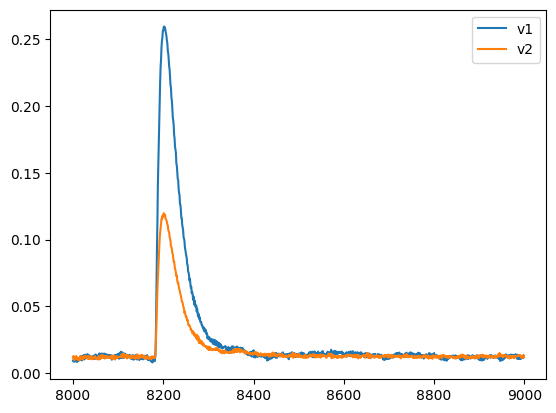

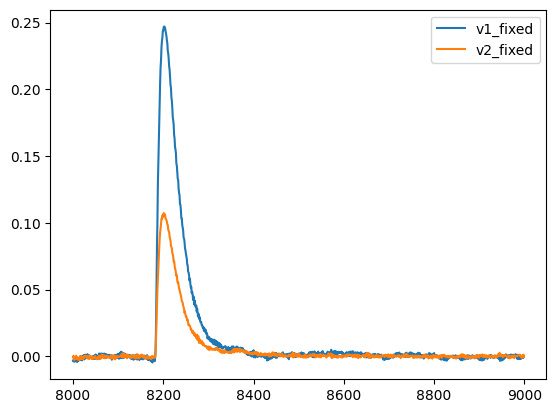

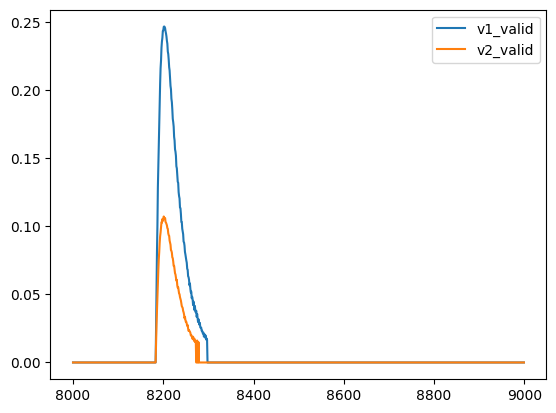

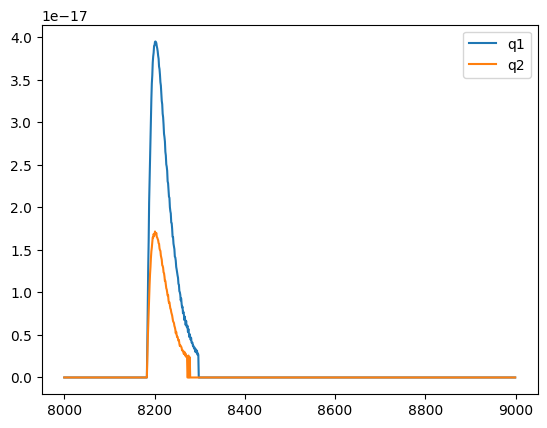

In [185]:
data = pd.read_csv(fname)[8000:9000]
# data.index = data["time"]

data[["v1", "v2"]].plot()
data[["v1_fixed", "v2_fixed"]].plot()
data[["v1_valid", "v2_valid"]].plot()
data[["q1", "q2"]].plot()

任意の2つのカラムの相関関数を計算します。
相関関数（``np.correlate``）は``np.array``で返ってきます。
``np.correlate``の``mode``は``valid|same|full``から選択できます。

In [168]:
def draw_correlation(data: pd.DataFrame, x: str, y: str):
    copied = data.copy()
    a = copied[x]
    v = copied[y]
    left = pd.DataFrame(np.correlate(a, v, mode="same"))
    right = pd.DataFrame(np.correlate(a, v, mode="full"))

    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    left.plot(ax=axs[0])
    right.plot(ax=axs[1])

    l_max = left[0].max()
    l_idx = left[0].idxmax()
    r_max = right[0].max()
    r_idx = right[0].idxmax()

    print(l_idx, l_max)
    print(r_idx, r_max)

    return fig

500 3.0975566804409027
999 3.0975566804409027


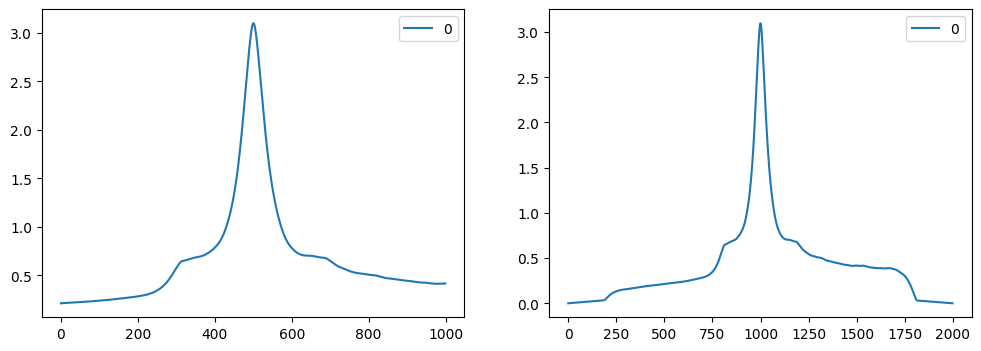

In [169]:
fig = draw_correlation(data, x="v1", y="v2")

生信号の相関関数はなかなか面白い形をすることがわかりました。

500 2.464396793246274
999 2.464396793246274


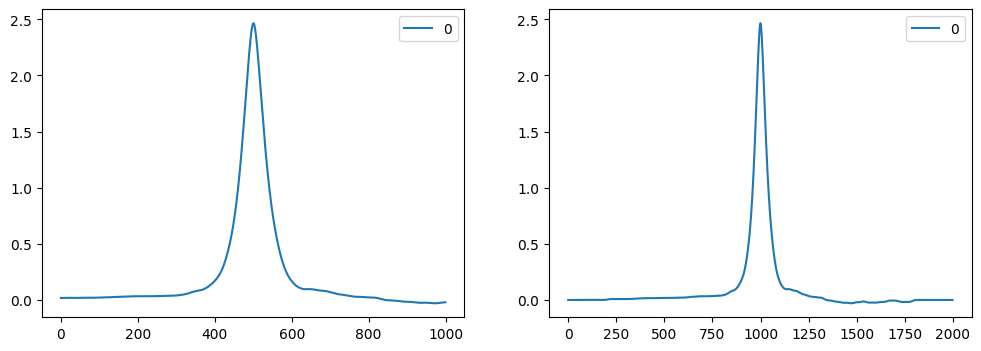

In [170]:
fig = draw_correlation(data, x="v1_fixed", y="v2_fixed")

オフセットを調整した波形を使うと、生信号のときよりピークがはっきりと立つことがわかりました。

500 2.445904767155647
999 2.445904767155647


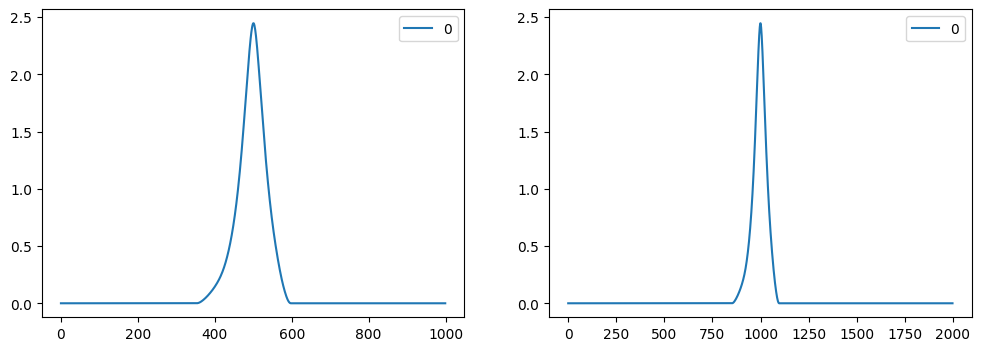

In [171]:
fig = draw_correlation(data, x="v1_valid", y="v2_valid")

スレッショルドを設定し、信号のセレクションをした波形は、よりピークが鮮明になることがわかりました。

横軸を時間に戻す方法が分からない